In [1]:
# %pip install opencv-python
# %pip install opencv-contrib-python
# %pip install opencv-python-headless

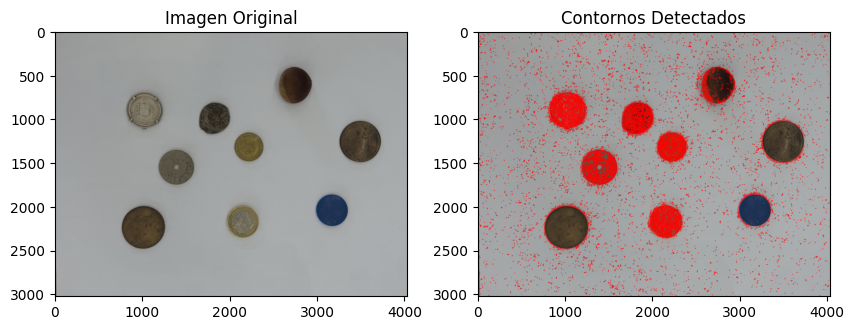

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color
image = cv2.imread('Imagenes//IMG_Monedas.jpg')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el detector de bordes Canny
edges = cv2.Canny(gray, threshold1=10, threshold2=30)

# Encontrar los contornos en la imagen de bordes
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en rojo sobre la imagen original
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 0, 255), thickness=2)  # Rojo en formato BGR

# Mostrar la imagen original y la imagen con los contornos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib

plt.subplot(1, 2, 2)
plt.title('Contornos Detectados')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib

plt.show()

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

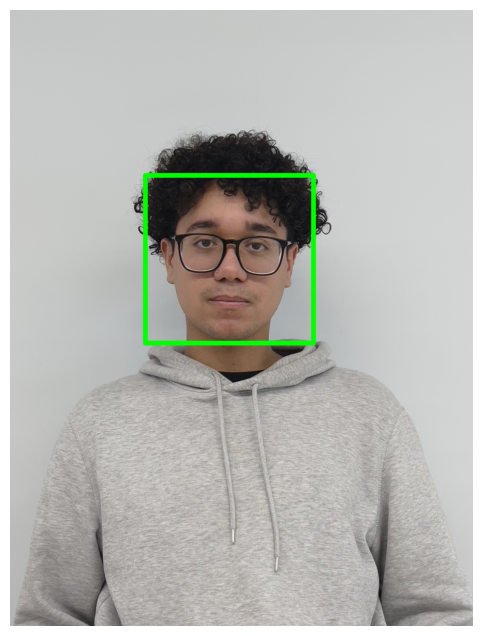

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Imagenes//IMG_Ralphy.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_class = cv2.CascadeClassifier(
	cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_class.detectMultiScale(
	gray, 
	scaleFactor=1.11,
    minNeighbors=35, 
	minSize=(30, 30)
)

for (x,y,w,h) in face:
	cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),30)

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 8))
plt.imshow(img_rgb)
plt.axis("off")

In [47]:
import os, cv2
import numpy as np

image_folder = 'Brad Pitt'

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faceRecognizer = cv2.face.EigenFaceRecognizer_create()

faces = []
labels = []
label = 0

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(image_folder, filename)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Error al cargar la imagen {filename}")
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces_detected = faceClassif.detectMultiScale(gray, 1.2, 1)
        for (x, y, w, h) in faces_detected:
            y = max(0, y - 10)
            h = min(gray.shape[0] - y, h + 20)

            face = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (100, 100))
            faces.append(face_resized)
            labels.append(label)
        
        label += 1

if faces and labels:
    faceRecognizer.train(faces, np.array(labels))
    faceRecognizer.save('eigenfaces_model.xml')  
else:
    print("No se detectaron rostros para entrenar el modelo.")


image_folder = 'comprobar'

for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(image_folder, filename)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Error al cargar la imagen {filename}")
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceClassif.detectMultiScale(gray, 1.45, 7)

        for (x, y, w, h) in faces:
            y = max(0, y - 10)
            h = min(gray.shape[0] - y, h + 20)

            face = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face, (100, 100))

            label, confidence = faceRecognizer.predict(face_resized)

            if confidence < 3500:
                cv2.putText(image, 'Brat Pitt', (x, y - 25), 2, 1.1, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            else:
                cv2.putText(image, 'Desconocido', (x, y - 25), 2, 1.1, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        cv2.imshow('Image', image)
        cv2.waitKey(0)

cv2.destroyAllWindows()